#LSTM正向传播

### sigmoid Function

$\sigma(x) =\frac{1}{1 + e ^{-x}} $

$\begin{split}
\sigma '(x) &= \frac{-e ^{-x}}{{(1 + e ^{-x})}^2} \\
 &= \sigma (x) ( 1 - \sigma (x))
\end{split}
$

### tanh Function

$tanh(x)=\frac{e ^{x}-e ^{-x}}{e ^{x} + e ^{-x}}  $

$tanh'(x)=1-tanh^2(x)$ 

### LSTM Function

$F_6=f^t=\sigma (W_f*h^{t-1} + U_f * x^t +b_f)$

$F_5=i^t = \sigma (W_i * h ^{t-1} +U_i* x^t  + b_i)$

$F_4=a^t = tanh( W_a *h^{t-1} + U_a *x^t +b_a)$

$F_3=C^t = C^{t-1} * f^t + i ^t * a ^t$

$F_2=O^t=\sigma (W_o *h^{t-1} + U_o *x^t + b_o)$

$F_1=h^t = O^t * tanh(C^t)$

$F = \tilde{y}_{(t)} = \sigma (V*h^t + C)$

$loss = (y_{(t)} - \tilde{y}_{(t)})^2$

#LSTM反向训练参数

$
\begin{split}
\Delta C &= -\alpha \frac{\partial loss}{\partial C} \\
 & =-\alpha 
 \frac{\partial loss}{\partial \tilde{y}_{(t)}}  
 \frac{\partial \tilde{y}_{(t)}}{\partial \sigma} 
 \frac{\partial \sigma}{\partial C}\\
 & =2\alpha (y_{(t)} - \tilde{y}_{(t)}) F(1-F)
\end{split}
$



$
\begin{split}
\Delta V &= -\alpha \frac{\partial loss}{\partial V} \\
 & =-\alpha 
 \frac{\partial loss}{\partial \tilde{y}_{(t)}} 
 \frac{\partial \tilde{y}_{(t)}}{\partial \sigma} 
 \frac{\partial \sigma}{\partial V}\\
 & =2\alpha (y_{(t)} - \tilde{y}_{(t)}) F(1-F) F_1\\
 & =\Delta C F_1
\end{split}
$

$
\begin{split}
\Delta b_o &= -\alpha \frac{\partial loss}{\partial b_o} \\ 
 & =-\alpha 
 \frac{\partial loss}{\partial \tilde{y}_{(t)}} 
 \frac{\partial \tilde{y}_{(t)}}{\partial \sigma} 
 \frac{\partial \sigma}{\partial h^{t}} 
 \frac{\partial h^{t}}{\partial O^t} 
 \frac{\partial O^t}{\partial \sigma} 
 \frac{\partial \sigma}{\partial b_o}\\ 
 & =2\alpha (y_{(t)} - \tilde{y}_{(t)}) F(1-F) V tanh(F_3) F_2(1-F_2 )\\ 
 & =\Delta C V tanh(F_3) F_2(1-F_2)
\end{split}
$

$
\begin{split}
\Delta U_o &= -\alpha \frac{\partial loss}{\partial U_o} \\
 & =-\alpha 
 \frac{\partial loss}{\partial \tilde{y}_{(t)}}  
 \frac{\partial \tilde{y}_{(t)}}{\partial \sigma} 
 \frac{\partial \sigma}{\partial h^{t}} 
 \frac{\partial h^{t}}{\partial O^t} 
 \frac{\partial O^t}{\partial \sigma} 
 \frac{\partial \sigma}{\partial U_o}\\
 & =2\alpha (y_{(t)} - \tilde{y}_{(t)}) F(1-F) V tanh(F_3) F_2(1-F_2) x^{t}\\
  & =\Delta b_o x^{t}
\end{split}
$

$
\begin{split}
\Delta W_o &= -\alpha \frac{\partial loss}{\partial W_o} \\
 & =-\alpha 
 \frac{\partial loss}{\partial \tilde{y}_{(t)}}  
 \frac{\partial \tilde{y}_{(t)}}{\partial \sigma} 
 \frac{\partial \sigma}{\partial h^{t}} 
 \frac{\partial h^{t}}{\partial O^t} 
 \frac{\partial O^t}{\partial \sigma} 
 \frac{\partial \sigma}{\partial W_o}\\
 & =2\alpha (y_{(t)} - \tilde{y}_{(t)}) F(1-F) V tanh(F_3) F_2(1-F_2) h^{t-1}\\
 & =\Delta b_o h^{t-1}
\end{split}
$

$
\begin{split}
\Delta b_a &= -\alpha \frac{\partial loss}{\partial b_a} \\
 & =-\alpha 
 \frac{\partial loss}{\partial \tilde{y}_{(t)}}  
 \frac{\partial \tilde{y}_{(t)}}{\partial \sigma} 
 \frac{\partial \sigma}{\partial h^{t}} 
 \frac{\partial h^{t}}{\partial tanh} 
 \frac{\partial tanh}{\partial C^t} 
 \frac{\partial C^t}{\partial a^t} 
 \frac{\partial a^t}{\partial tanh} 
 \frac{\partial tanh}{\partial b_a}\\
 & =2\alpha (y_{(t)} - \tilde{y}_{(t)}) F(1-F) V F_2 (1-F_1 ^ 2) F_5 (1-F_4 ^ 2)\\
 & =\Delta C V F_2 (1-F_1 ^ 2) F_5 (1-F_4 ^ 2)
\end{split}
$

$
\begin{split}
\Delta U_a &= -\alpha \frac{\partial loss}{\partial U_a} \\
 & =-\alpha 
 \frac{\partial loss}{\partial \tilde{y}_{(t)}}  
 \frac{\partial \tilde{y}_{(t)}}{\partial \sigma} 
 \frac{\partial \sigma}{\partial h^{t}} 
 \frac{\partial h^{t}}{\partial tanh} 
 \frac{\partial tanh}{\partial C^t} 
 \frac{\partial C^t}{\partial a^t} 
 \frac{\partial a^t}{\partial tanh} 
 \frac{\partial tanh}{\partial U_a}\\
 & =2\alpha (y_{(t)} - \tilde{y}_{(t)}) F(1-F) V F_2 (1-F_1 ^ 2) F_5(1-F_4 ^ 2) x^t \\
 & =\Delta b_a x^t
\end{split}
$

$
\begin{split}
\Delta W_a &= -\alpha \frac{\partial loss}{\partial W_a} \\
 & =-\alpha 
 \frac{\partial loss}{\partial \tilde{y}_{(t)}}  
 \frac{\partial \tilde{y}_{(t)}}{\partial \sigma} 
 \frac{\partial \sigma}{\partial h^{t}} 
 \frac{\partial h^{t}}{\partial tanh} 
 \frac{\partial tanh}{\partial C^t} 
 \frac{\partial C^t}{\partial a^t} 
 \frac{\partial a^t}{\partial tanh} 
 \frac{\partial tanh}{\partial W_a}\\
 & =2\alpha (y_{(t)} - \tilde{y}_{(t)}) F(1-F) V F_2 (1-F_1 ^ 2)F_5(1-F_4 ^ 2)  h^{t-1} \\
 & =\Delta b_a  h^{t-1}
\end{split}
$

$
\begin{split}
\Delta b_i &= -\alpha \frac{\partial loss}{\partial W_a} \\
 & =-\alpha 
 \frac{\partial loss}{\partial \tilde{y}_{(t)}}  
 \frac{\partial \tilde{y}_{(t)}}{\partial \sigma} 
 \frac{\partial \sigma}{\partial h^{t}} 
 \frac{\partial h^{t}}{\partial tanh} 
 \frac{\partial tanh}{\partial C^t} 
 \frac{\partial C^t}{\partial i^t} 
 \frac{\partial i^t}{\partial \sigma} 
 \frac{\partial \sigma}{\partial b_i}\\
 & =2\alpha (y_{(t)} - \tilde{y}_{(t)})
    F(1-F) V F_2 (1-F_3 ^ 2)F_4 F_5(1-F_5 ) \\
 & =\Delta C V F_2 (1-F_3 ^ 2)F_4 F_5(1-F_5 )
\end{split}
$

$
\begin{split}
\Delta U_i &= -\alpha \frac{\partial loss}{\partial W_a} \\
 & =-\alpha 
 \frac{\partial loss}{\partial \tilde{y}_{(t)}}  
 \frac{\partial \tilde{y}_{(t)}}{\partial \sigma} 
 \frac{\partial \sigma}{\partial h^{t}} 
 \frac{\partial h^{t}}{\partial tanh} 
 \frac{\partial tanh}{\partial C^t} 
 \frac{\partial C^t}{\partial i^t} 
 \frac{\partial i^t}{\partial \sigma} 
 \frac{\partial \sigma}{\partial b_i}\\
 & =2\alpha (y_{(t)} - \tilde{y}_{(t)})
    F(1-F) V F_2 (1-F_3 ^ 2)F_4 F_5(1-F_5 ) x^t\\
 & =\Delta b_i x^t
\end{split}
$

$
\begin{split}
\Delta W_i &= -\alpha \frac{\partial loss}{\partial W_a} \\
 & =-\alpha 
 \frac{\partial loss}{\partial \tilde{y}_{(t)}}  
 \frac{\partial \tilde{y}_{(t)}}{\partial \sigma} 
 \frac{\partial \sigma}{\partial h^{t}} 
 \frac{\partial h^{t}}{\partial tanh} 
 \frac{\partial tanh}{\partial C^t} 
 \frac{\partial C^t}{\partial i^t} 
 \frac{\partial i^t}{\partial \sigma} 
 \frac{\partial \sigma}{\partial W_i}\\
 & =2\alpha (y_{(t)} - \tilde{y}_{(t)}) 
    F(1-F) V F_2 (1-F_3 ^ 2)F_4 F_5(1-F_5 )  h^{t-1} \\
 & =\Delta b_i  h^{t-1}
\end{split}
$

$
\begin{split}
\Delta b_f &= -\alpha \frac{\partial loss}{\partial b_f} \\
 & =-\alpha 
 \frac{\partial loss}{\partial \tilde{y}_{(t)}}  
 \frac{\partial \tilde{y}_{(t)}}{\partial \sigma} 
 \frac{\partial \sigma}{\partial h^{t}} 
 \frac{\partial h^{t}}{\partial tanh} 
 \frac{\partial tanh}{\partial C^t} 
 \frac{\partial C^t}{\partial f^t} 
 \frac{\partial f^t}{\partial \sigma} 
 \frac{\partial \sigma}{\partial b_f}\\
 & =2\alpha (y_{(t)} - \tilde{y}_{(t)})
    F(1-F) V F_2 (1-F_3 ^ 2) C^{t-1}F_5(1-F_5 ) \\
 & =\Delta C V F_2 (1-F_3 ^ 2)C^{t-1}F_5(1-F_5 )
\end{split}
$

$
\begin{split}
\Delta U_f &= -\alpha \frac{\partial loss}{\partial U_f} \\
 & =-\alpha 
 \frac{\partial loss}{\partial \tilde{y}_{(t)}}  
 \frac{\partial \tilde{y}_{(t)}}{\partial \sigma} 
 \frac{\partial \sigma}{\partial h^{t}} 
 \frac{\partial h^{t}}{\partial tanh} 
 \frac{\partial tanh}{\partial C^t} 
 \frac{\partial C^t}{\partial f^t} 
 \frac{\partial f^t}{\partial \sigma} 
 \frac{\partial \sigma}{\partial U_f}\\
 & =2\alpha (y_{(t)} - \tilde{y}_{(t)})
    F(1-F) V F_2 (1-F_3 ^ 2) C^{t-1}F_5(1-F_5 )x^t \\
 & =\Delta b_f x^t
\end{split}
$

$
\begin{split}
\Delta W_f &= -\alpha \frac{\partial loss}{\partial W_f} \\
 & =-\alpha 
 \frac{\partial loss}{\partial \tilde{y}_{(t)}}  
 \frac{\partial \tilde{y}_{(t)}}{\partial \sigma} 
 \frac{\partial \sigma}{\partial h^{t}} 
 \frac{\partial h^{t}}{\partial tanh} 
 \frac{\partial tanh}{\partial C^t} 
 \frac{\partial C^t}{\partial f^t} 
 \frac{\partial f^t}{\partial \sigma} 
 \frac{\partial \sigma}{\partial W_f}\\
 & =2\alpha (y_{(t)} - \tilde{y}_{(t)})
    F(1-F) V F_2 (1-F_3 ^ 2) C^{t-1}F_5(1-F_5 ) h^{t-1} \\
 & =\Delta b_f  h^{t-1} 
\end{split}
$

In [1]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

from math import tanh,exp

class lstmCellState():
    def __init__(self):
        self.Wf = [0.01,  0.01,  0.01]
        #---------[-Wf-, -Uf-, -bf-]
        self.Wi = [0.01,  0.01,  0.01]
        #---------[-Wi-, -Ui-, -bi-]     
        self.Wa = [0.01,  0.01,  0.01]
        #---------[-Wa-, -Ua-, -ba-]       
        self.Wo = [0.01,  0.01,  0.01]
        #---------[-Wo-, -Uo-, -bo-]        
        self.Wy = [0.1, 0.1]
        #---------[-V- , -C-]        
        self.Fi = [0.0, # F0    predict Y(t)
                   0.0, # F1   ht
                   0.0, # F2   Ot
                   0.0, # F3   Ct
                   0.0, # F4   at
                   0.0, # F5   it
                   0.0] # F6   ft

class lstmCell():
    def __init__(self,lrate=0.03,lround=1000):
        self.X  = 0.0
        self.Ct0 = 0.0
        self.ht0 = 0.0
        self.Ct1 = 0.0
        self.ht1 = 0.0
        self.Y  = 0.0
        
        self.lrate = lrate
        self.lround = lround
        
        self.state=lstmCellState()

    def sigmoid(self,x):
        return 1. / (1. + exp(-x))   
    
    def sigmoid_dev(self,x):
        return x*(1 - x)
    
    def tanh_dev(self,x):
        return 1 - x **2 
  
    def forward(self,Xt,Ct0=None,Ht0=None):
        self.X  = Xt
        if Ct0:self.Ct0 = Ct0
        if Ht0:self.ht0 = Ht0
        
        #ft
        self.state.Fi[6] = self.sigmoid(self.state.Wf[0]*self.ht0+
                                        self.state.Wf[1]*self.X+ 
                                        self.state.Wf[2])
        #it
        self.state.Fi[5] = self.sigmoid(self.state.Wi[0]*self.ht0+
                                        self.state.Wi[1]*self.X+ 
                                        self.state.Wi[2]) 
        #at
        self.state.Fi[4] = tanh(self.state.Wa[0]*self.ht0 +
                                self.state.Wa[1]*self.X + 
                                self.state.Wa[2])  
        #Ct
        self.state.Fi[3] = self.Ct0*self.state.Fi[6]+\
                           self.state.Fi[5]*self.state.Fi[4]  
        #Ot
        self.state.Fi[2] = self.sigmoid(self.state.Wo[0]*self.ht0+
                                        self.state.Wo[1]*self.X+ 
                                        self.state.Wo[2])
        #ht
        self.state.Fi[1] = self.state.Fi[2]*tanh(self.state.Fi[3])
        #Yt
        self.state.Fi[0] = self.sigmoid(self.state.Wy[0]*self.state.Fi[1]+
                                        self.state.Wy[1])         
        self.Y = self.state.Fi[0]
        self.Ct1 = self.state.Fi[3]
        self.ht1 = self.state.Fi[1]
    
    def backward(self,Y):
        Err = Y - self.Y
        
        D_C = 2 * self.lrate * Err * self.sigmoid_dev(self.state.Fi[0])
        D_V = D_C * self.state.Fi[1]
        
        Dtmp0 = D_C * self.state.Wy[0]
        
        D_bo = Dtmp0 * tanh(self.state.Fi[3]) * self.sigmoid_dev(self.state.Fi[2])
        D_Uo = D_bo * self.X
        D_Wo = D_bo * self.ht0
        
        D_ba = Dtmp0 *  self.tanh_dev(self.state.Fi[1]) *\
               self.state.Fi[5] * self.tanh_dev(self.state.Fi[4])
        D_Ua = D_ba * self.X
        D_Wa = D_ba * self.ht0
        
        Dtmp1 = Dtmp0 * self.state.Fi[2] *\
               self.tanh_dev(self.state.Fi[3]) * self.sigmoid_dev(self.state.Fi[5])
        
        D_bi = Dtmp1 * self.state.Fi[4] 
        D_Ui = D_bi * self.X
        D_Wi = D_bi * self.ht0
        
        D_bf = Dtmp1 * self.Ct0  
        D_Uf = D_bf * self.X
        D_Wf = D_bf * self.ht0
        
        self.state.Wf[0] += D_Wf
        self.state.Wf[1] += D_Uf
        self.state.Wf[2] += D_bf
        
        self.state.Wi[0] += D_Wi
        self.state.Wi[1] += D_Ui
        self.state.Wi[2] += D_bi
        
        self.state.Wo[0] += D_Wo
        self.state.Wo[1] += D_Uo
        self.state.Wo[2] += D_bo
        
        self.state.Wa[0] += D_Wa
        self.state.Wa[1] += D_Ua
        self.state.Wa[2] += D_ba
        
        self.state.Wy[0] += D_V
        self.state.Wy[1] += D_C
    
    def train(self,Serie):
        for loop in xrange(self.lround):
            for i in range(len(Serie)-1):
                if loop == 0:self.forward(Serie[i])
                else:self.forward(Serie[i],self.Ct1,self.ht1)
                self.backward(Serie[i+1])
                
    def train2(self,X,Y):
        assert(len(X)==len(Y))
        for loop in xrange(self.lround):
            for i in range(len(X)):
                if loop == 0:self.forward(X[i])
                else:self.forward(X[i],self.Ct1,self.ht1)
                self.backward(Y[i])


(600, 600)


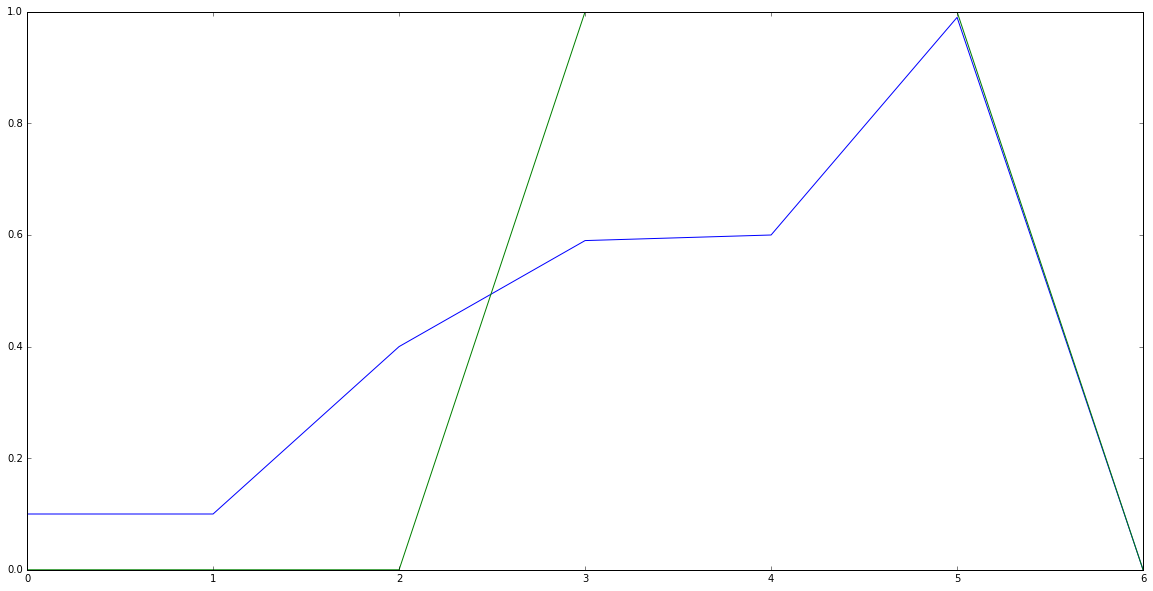

In [12]:
import random
x = [random.random() for i in xrange(600)]
y = [ 0 if i<0.5 else 1 for i in x]

print(len(x),len(y))

Cell_1 = lstmCell(0.03,3000)

Cell_1.train2(x,y)

x = [0.1,0.1,0.4,0.59,0.6,0.99,0.0]
y = []
for i in range(len(x)):
    Cell_1.forward(x[i],Cell_1.Ct1,Cell_1.ht1)
    y.append(Cell_1.Y.real)

plt.figure(figsize=(20,10))
plt.plot(x)
plt.plot(y)

In [368]:
#Cell_1.train(X)

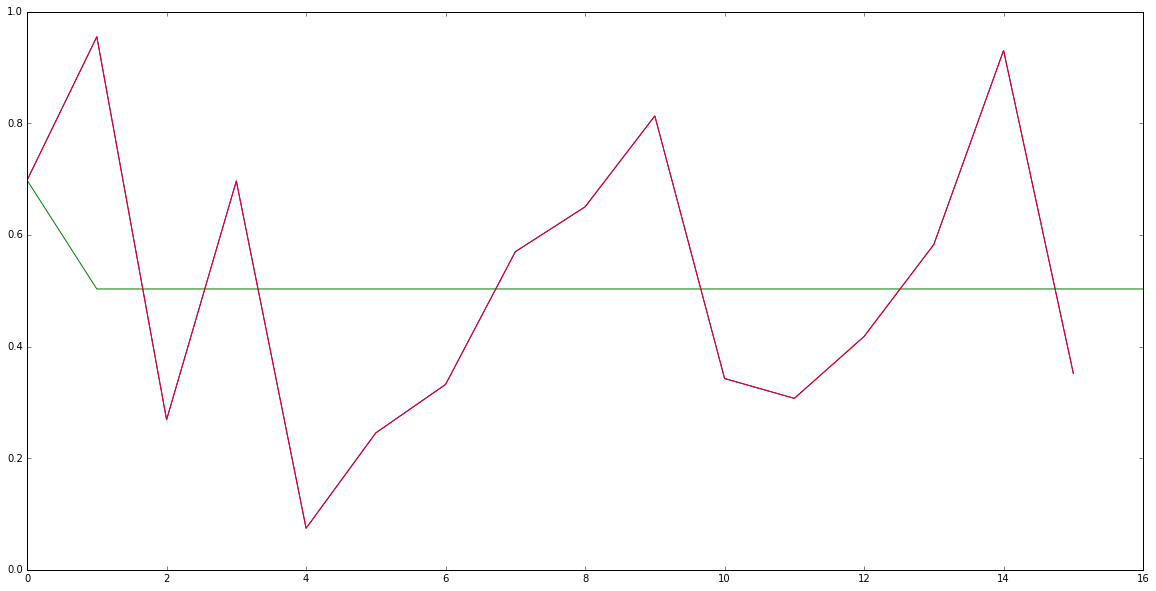

In [401]:
import random
Cell_1 = lstmCell(0.06,40000)

#x = [0.1, 0.2, 0.0, 0.2 ,0.1 ,0.3, 0.2, 0.4] *3
x = [random.random() for i in range(16)]
#x = [0.1, 0.2, 0.0, 0.2] *3

Cell_1.train(x)

y = []

for i in range(len(x)):
    Cell_1.forward(x[i],Cell_1.Ct1,Cell_1.ht1)
    y.append(Cell_1.Y.real)

plt.figure(figsize=(20,10))
plt.plot(x)
y.insert(0,x[0])

plt.plot(y)
plt.plot(x)

In [39]:
# coding=utf-8
import sys
import os
import time

class prePro():
    def __init__(self,ecsDataPath,inputFilePath,resultFilePath):        
        InputInfos=self.readInput(inputFilePath)
        self.phsDev=InputInfos[0] # (int(cpu),int(ram),int(disk))
        self.virDevs=InputInfos[1]# dict[ID]:(int(cpus),int(rams))
        self.firstCare=InputInfos[2]# CPU or MEM
        self.predicStrTime=InputInfos[3]# timestamp
        self.predicEndTime=InputInfos[4]# timestamp
        
        self.predicLength=self.predicEndTime-self.predicStrTime
        
        self.pool=[[],[],[],[],[],
                   [],[],[],[],[],
                   [],[],[],[],[]]

        self.legi={"flavor1":0,"flavor2":1,"flavor3":2,"flavor4":3,
                   "flavor5":4,"flavor6":5,"flavor7":6,"flavor8":7,
                   "flavor9":8,"flavor10":9,"flavor11":10,"flavor12":11,
                   "flavor13":12,"flavor14":13,"flavor15":14}
        # Counts of flavor0 ~ flavor15
        with open(ecsDataPath, 'r') as f:
            lines = f.readlines()  
        self.startime=self.date2read(lines[0].strip().split('\t')[2])
        self.endstime=self.date2read(lines[-1].strip().split('\t')[2])+86400
        for line in lines:
            self.mkpool(line)
        
        #print(self.pool)
        #self.results=self.predict()
        #print(self.results)
        #self.putPhs(resultFilePath)
        
    def date2read(self,dt):
        dt = dt.split()[0]
        return time.mktime(time.strptime(dt,'%Y-%m-%d'))    
    
    def readTime(self,timeStr):
        return time.mktime(time.strptime(timeStr,'%Y-%m-%d %H:%M:%S'))

    def time2read(self,dt):
        dt = dt.split('\t')[0]
        return time.mktime(time.strptime(dt,'%Y-%m-%d %H:%M:%S'))

    def timeMh(self,d1,d2):
        #return int((d1-d2)/604800) #a week
        #return int((d1-d2)/3600) #a hour
        #return int((d1-d2)/(self.predicLength*0.25)) #a day
        return int((d1-d2)/(self.predicLength*0.5)) #a day

    def readInput(self,inputFilePath):
        if os.path.exists(inputFilePath):
            with open(inputFilePath,'r') as f:
                cpu,ram,disk=f.readline().strip().split()
                f.readline()
                phsDev=(int(cpu),int(ram),int(disk))
                virDevCount=int(f.readline().strip())
                virDevs={}
                for i in range(virDevCount):
                    Id,cpus,rams=f.readline().strip().split()
                    virDevs[Id]=(int(cpus),int(rams))
                f.readline()
                firstCare=f.readline().strip()
                f.readline()
                predicStrTime=self.readTime(f.readline().strip())
                predicEndTime=self.readTime(f.readline().strip())
                #print(phsDev,virDevs,firstCare,predicStrTime,predicEndTime)
            return phsDev,virDevs,firstCare,predicStrTime,predicEndTime

        else:
            print('file not exist: ' + file_path)
            return None
    
    def mkpool(self,raw):
        flavor,tm=raw.strip().split("\t")[1:]
        TM=self.time2read(tm)
        if flavor in self.virDevs:
            hourTM=self.timeMh(TM,self.startime)
            while hourTM - len(self.pool[self.legi[flavor]]) >= 0:
                self.pool[self.legi[flavor]].append(0)       
            self.pool[self.legi[flavor]][hourTM]+=1
            
    def predict(self):
        predicts={}
        predTime=self.predicEndTime - self.predicStrTime
        dataTime=self.endstime-self.startime     
        for i in self.virDevs:
            Cell_i = lstmCell(0.008,20000)
            tmpList=self.pool[self.legi[i]]
            M,r=MnSize(tmpList)
            
            Datas[each]=[M,r]
            Cell_i.train(r)
            Cell_i.forward(tmpList[-1],Cell_i.Ct1,Cell_i.ht1)
            Y1 = int(round(Cell_i.Y*M))
            Cell_i.forward(Cell_i.Y,Cell_i.Ct1,Cell_i.ht1)
            Y2 = int(round(Cell_i.Y*M))
            
            counts=Y1+Y2
            predicts[i]=counts
            
        return predicts

    def putPhs(self,resultFile):
        results=self.results.copy()
        Hdev=list(self.phsDev)
        HDs={0:list(Hdev[:2])}
        HDf={0:{"flavor1":0,"flavor2":0,"flavor3":0,"flavor4":0,"flavor5":0,
                "flavor6":0,"flavor7":0,"flavor8":0,"flavor9":0,"flavor10":0,
                "flavor11":0,"flavor12":0,"flavor13":0,"flavor14":0,"flavor15":0}}

        def selectHard(hdf,hds,dev):
            for i in hds:
                if hds[i][0] > self.virDevs[dev][0] and\
                   hds[i][1] > self.virDevs[dev][1]/1024.0:
                    return i

            hds[len(hds)]=list(Hdev[:2])
            hdf[len(hdf)]={"flavor1":0,"flavor2":0,"flavor3":0,"flavor4":0,
                           "flavor5":0,"flavor6":0,"flavor7":0,"flavor8":0,
                           "flavor9":0,"flavor10":0,"flavor11":0,"flavor12":0,
                           "flavor13":0,"flavor14":0,"flavor15":0}
            return len(hds)-1

        def isHave(predev=self.results):
            for i in predev:
                if predev[i]>0:
                    return True
            return False

        def genKeys(predev=self.results):
            cpukeys = ["flavor15","flavor14","flavor13","flavor12","flavor11",
                    "flavor10","flavor9","flavor8","flavor7","flavor6",
                    "flavor5","flavor4","flavor3","flavor2","flavor1"]
            memkeys = ["flavor15","flavor14","flavor12","flavor13","flavor11",
                    "flavor9","flavor10","flavor8","flavor6","flavor7",
                    "flavor5","flavor3","flavor4","flavor2","flavor1"]

            if self.firstCare == "CPU":keys=cpukeys
            if self.firstCare == "MEM":keys=memkeys

            res = []
            for key in keys:
                if key in predev.keys():
                    for i in range(predev[key]):
                        res.append(key)
            return res

        def sv(hdf=HDf,hds=HDs,predev=results):
            keys = genKeys()
            while isHave(predev):
                isPlace = False
                for i in hds:
                    for key in keys:
                        if predev[key] > 0 and hds[i][0] >= self.virDevs[key][0]\
                           and hds[i][1] >= self.virDevs[key][1]/1024.0:
                            cpu,ram=self.virDevs[key]
                            hds[i][0] -= cpu
                            hds[i][1] -= ram/1024.0
                            hdf[i][key] += 1
                            predev[key] -= 1
                            keys.remove(key)
                            isPlace = True

                if isPlace == False :
                    hds[len(hds)]=Hdev[:]
                    hdf[len(hdf)]={"flavor1":0,"flavor2":0,"flavor3":0,"flavor4":0,
                        "flavor5":0,"flavor6":0,"flavor7":0,"flavor8":0,
                        "flavor9":0,"flavor10":0,"flavor11":0,"flavor12":0,
                        "flavor13":0,"flavor14":0,"flavor15":0}

        f=open(resultFile,"w")
        totals = int(sum([i for i in results.values()]))
        f.writelines([str(totals),'\n'])

        for ID,Count in results.iteritems():
            f.writelines([ID," ",str(int(Count)),'\n'])
        sv()
        f.writelines(['\n'])

        f.writelines([str(len(HDf)),'\n'])
        for each in HDf:
            f.writelines([str(each+1)])
            for i in HDf[each]:
                if i in results:
                    f.writelines([' ',i,' ',str(int(HDf[each][i]))])
            f.writelines(['\n'])
        f.close()

In [40]:
# coding=utf-8
import sys
import os
import time


def MnSize(X):
    result=[]
    M=max(X)
    for i in X:
        result.append(i/float(M))
    return M,result

ecsDataPath = "example/TrainData_2015.1.1_2015.2.19.txt"
inputFilePath = "example/inputFile"
resultFilePath = "example/outputFile"
result=prePro(ecsDataPath,inputFilePath,resultFilePath)



In [41]:
def AVG(X):
    return sum(X)/float(len(X))

def STD(X):
    avg=AVG(X)
    sdsq =  sum([(i - avg) ** 2 for i in X])
    return (sdsq / (len(X) - 1)) ** .5

def diff(X,interval=2):
    df = list()
    for i in range(interval,len(X)):
        value = X[i] - X[i-interval]
        df.append(value)
    for each in range(interval):
        df.insert(each,X[each])
    return df

def rediff(X,interval=2):
    redf = list()
    for i in range(len(X)):
        if i<interval:redf.append(X[i])
        else:redf.append(redf[i-interval] + X[i])
    return redf

def Sgsize(X):
    MAX = max(X)
    MIN = min(X)
    Len = MAX-MIN
    result = []
    for i in X:
        result.append((i-MIN)/float(Len))
    return MAX,MIN,result

def ReSize(MAX,MIN,X):
    result = []
    for i in X:
        result.append(i*float(MAX-MIN)+MIN)
    return result

In [42]:
Datas={}
for each in result.virDevs:
    tmpList=result.pool[result.legi[each]]
    #M,r=MnSize(tmpList)
    #Datas[each]=[M,r]
    Datas[each]=tmpList
print Datas

{'flavor8': [2, 2, 1, 4, 5, 4, 0, 1, 5, 1, 13, 3, 7, 28], 'flavor5': [0, 0, 0, 14, 1, 3, 0, 2, 1, 4, 3, 1, 3]}


In [43]:

print Datas['flavor5']
print
M,N,p = Sgsize(Datas['flavor5'])
print p

print ReSize(M,N,p)

[0, 0, 0, 14, 1, 3, 0, 2, 1, 4, 3, 1, 3]

[0.0, 0.0, 0.0, 1.0, 0.07142857142857142, 0.21428571428571427, 0.0, 0.14285714285714285, 0.07142857142857142, 0.2857142857142857, 0.21428571428571427, 0.07142857142857142, 0.21428571428571427]
[0.0, 0.0, 0.0, 14.0, 1.0, 3.0, 0.0, 2.0, 1.0, 4.0, 3.0, 1.0, 3.0]


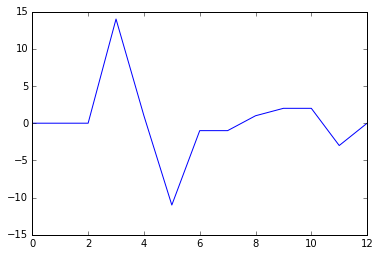

In [44]:
YY = diff(Datas['flavor5'],2)
plt.plot(YY)

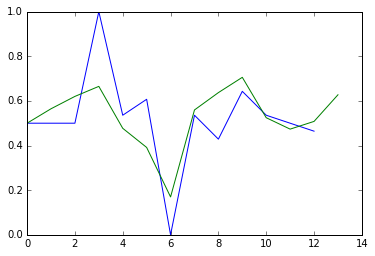

In [71]:
YY = diff(Datas['flavor5'],3)
#plt.plot(YY)
M,N,p = Sgsize(YY)

plt.plot(p)
C1 = lstmCell(0.03,50000)
C1.train(p)
yy = []
for i in p:
    C1.forward(i,C1.Ct1,C1.ht1)
    yy.append(C1.Y)

yy.insert(0,p[0])
plt.plot(yy)

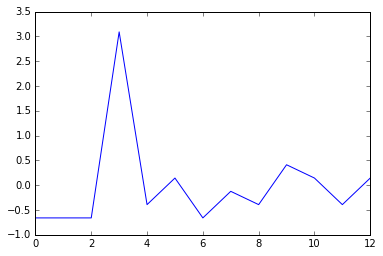

In [56]:
avg = AVG(Datas['flavor5'])
std = STD(Datas['flavor5'])
XX = []
for each in Datas['flavor5']:
    XX.append((each-avg) / std)
plt.plot(XX)

In [33]:
Cells={}
for i in result.virDevs:
    Cell_i = lstmCell(0.3,20000)
    Cell_i.train(Datas[i])
    Cells[i]=Cell_i

[1, 1, 1, 1, 1, 0, 0, 4, 4, 1, 2, 2, 0, 0, 0, 1, 5, 0, 0, 1, 12, 1, 3, 0, 7, 0, 1, 27]
[1, 1, 1, 1, 1, 0, 0, 4, 4, 1, 2, 2, 0, 0, 0, 1, 5, 0, 0, 1, 12, 1, 3, 0, 7, 0, 1, 27]


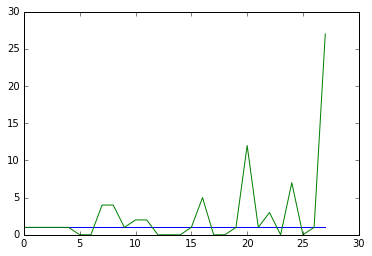

In [34]:
x = Datas['flavor8'][:]
print(x)
y = []
for each in x:
    Cells['flavor8'].forward(each,Cells['flavor8'].Ct1,Cells['flavor8'].ht1)
    #print Cell_1.ht1
    y.append(Cells['flavor8'].Y.real)
    
plt.plot(y)
y.insert(0,x[0])
print(x)

plt.plot(x)

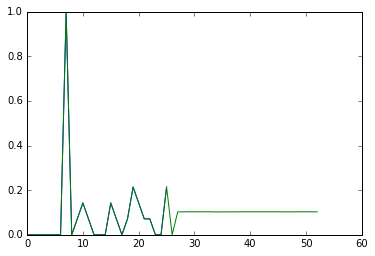

In [253]:
x = Datas['flavor5'][1][:]
y = []
for each in x:
    Cells['flavor8'].forward(each,Cells['flavor8'].Ct1,Cells['flavor8'].ht1)
    #print Cell_1.ht1
    y.append(Cells['flavor8'].Y.real)

plt.plot(x)
y.insert(0,x[0])
x.extend(y)

plt.plot(x)

[[0, 0, 0, 0, 0, 0, 0, 14, 0, 1, 2, 1, 0, 0, 0, 2, 1, 0, 1, 3, 2, 1, 1, 0, 0, 3], [1, 1, 1, 1, 1, 0, 0, 4, 4, 1, 2, 2, 0, 0, 0, 1, 5, 0, 0, 1, 12, 1, 3, 0, 7, 0, 1, 27]]


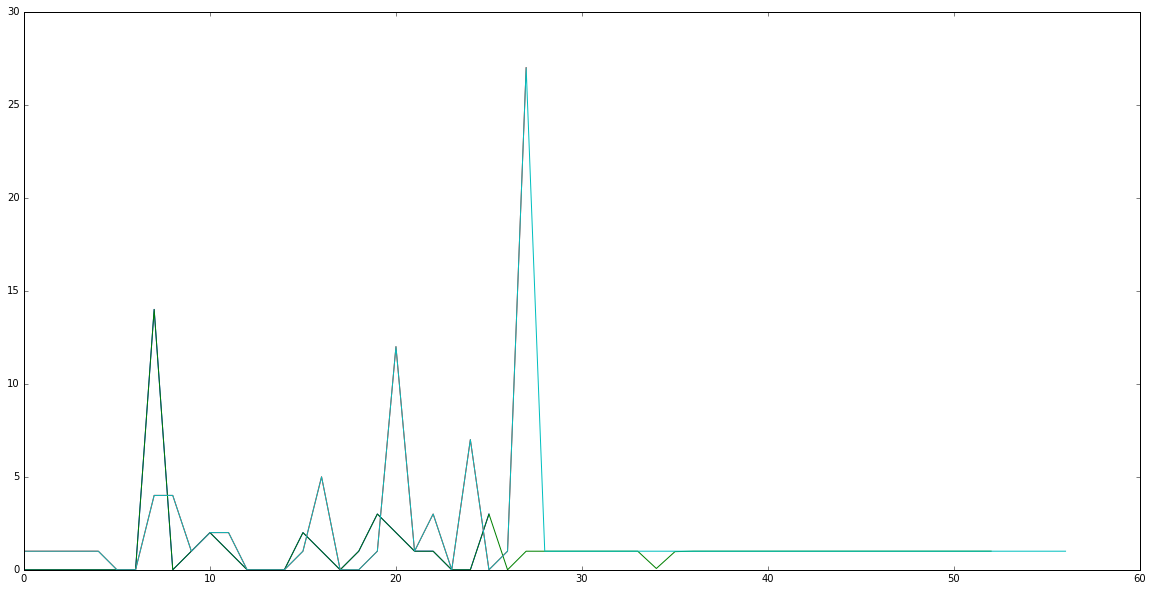

In [186]:
Datas=[]
for each in result.pool:
    if each != []:Datas.append(each)
print(Datas)
plt.figure(figsize=(20,10))

for i in xrange(len(Datas)):
    x = Datas[i][:]
    y = []
    for each in Datas[i]:
        Cells[i].forward(each,Cells[i].Ct1,Cells[i].ht1)
        #print Cell_1.ht1
        y.append(Cells[i].Y.real)
    plt.plot(x)
    y.insert(0,x[0])
    x.extend(y)

    plt.plot(x)